# Taller Regresión y clasificación - Parte 2
### Autor: Samuel Mesa
### Fecha: 20 de abril de 2021

### Objetivo: Use los datos Breast Cancer Wisconsin. Los datos los puede encontrar en el enlace de Kaggle.

 Importar las librerías para la lectura de datos, gráficas y para definir el modelo de los datos

In [1]:
import pandas as pd 
from sklearn.datasets import load_boston

In [2]:
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

%% [markdown]

In [3]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot:>

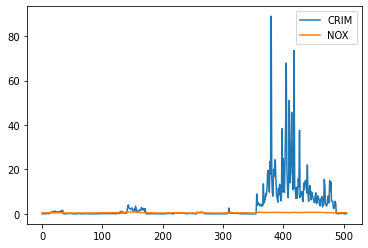

In [4]:
df[['CRIM', 'NOX']].plot()